In [59]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

In [5]:
# Loading the Preprocessed datasets 
df_customer = pd.read_csv('df_customer.csv')  
df_transaction = pd.read_csv('df_transaction.csv')

In [11]:
# Aggregate transaction data for each customer
cus_transactions = df_transaction.groupby('CustomerID').agg({'Quantity': 'sum',          
                            'TotalValue': 'sum',        
                            'TransactionID': 'count'    
                        }).reset_index()
cus_transactions

,CustomerID,Quantity,TotalValue,TransactionID
0,C0001,12,3354.52,5
1,C0002,10,1862.74,4
2,C0003,14,2725.38,4
3,C0004,23,5354.88,8
4,C0005,7,2034.24,3
5,C0006,12,4227.57,4
6,C0007,8,2579.82,3
7,C0008,20,4271.61,10
8,C0009,3,896.50,3
9,C0010,12,1717.55,4


In [13]:
# Merge customer profile with transaction data
cus_features = df_customer.merge(cus_transactions, on='CustomerID', how='left').fillna(0)
cus_features

,CustomerID,CustomerName,Region,SignupDate,SignupYear,Quantity,TotalValue,TransactionID
0,C0001,Lawrence Carroll,South America,2022-07-10,2022,12.0,3354.52,5.0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022,10.0,1862.74,4.0
2,C0003,Michael Rivera,South America,2024-03-07,2024,14.0,2725.38,4.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022,23.0,5354.88,8.0
4,C0005,Laura Weber,Asia,2022-08-15,2022,7.0,2034.24,3.0
5,C0006,Brittany Palmer,South America,2024-01-07,2024,12.0,4227.57,4.0
6,C0007,Paul Graves,Asia,2022-06-18,2022,8.0,2579.82,3.0
7,C0008,David Li,North America,2024-01-13,2024,20.0,4271.61,10.0
8,C0009,Joy Clark,Europe,2023-08-14,2023,3.0,896.50,3.0
9,C0010,Aaron Cox,Europe,2022-12-15,2022,12.0,1717.55,4.0


In [17]:
if 'Region' in cus_features.columns:
    cus_features['Region'] = cus_features['Region'].astype('category').cat.codes

cus_features

,CustomerID,CustomerName,Region,SignupDate,SignupYear,Quantity,TotalValue,TransactionID
0,C0001,Lawrence Carroll,3,2022-07-10,2022,12.0,3354.52,5.0
1,C0002,Elizabeth Lutz,0,2022-02-13,2022,10.0,1862.74,4.0
2,C0003,Michael Rivera,3,2024-03-07,2024,14.0,2725.38,4.0
3,C0004,Kathleen Rodriguez,3,2022-10-09,2022,23.0,5354.88,8.0
4,C0005,Laura Weber,0,2022-08-15,2022,7.0,2034.24,3.0
5,C0006,Brittany Palmer,3,2024-01-07,2024,12.0,4227.57,4.0
6,C0007,Paul Graves,0,2022-06-18,2022,8.0,2579.82,3.0
7,C0008,David Li,2,2024-01-13,2024,20.0,4271.61,10.0
8,C0009,Joy Clark,1,2023-08-14,2023,3.0,896.50,3.0
9,C0010,Aaron Cox,1,2022-12-15,2022,12.0,1717.55,4.0


In [21]:
X = cus_features[['Region', 'Quantity', 'TotalValue', 'TransactionID']]

# Standardize the features to bring all variables to the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.24138358, -0.1107351 , -0.05188436,  0.        ],
       [-1.40925752, -0.43404927, -0.86271433, -0.45129368],
       [ 1.24138358,  0.21257907, -0.393842  , -0.45129368],
       [ 1.24138358,  1.66749283,  1.03537505,  1.35388105],
       [-1.40925752, -0.91902053, -0.76949861, -0.90258736],
       [ 1.24138358, -0.1107351 ,  0.42264614, -0.45129368],
       [-1.40925752, -0.75736344, -0.47295849, -0.90258736],
       [ 0.35783655,  1.18252158,  0.44658328,  2.25646841],
       [-0.52571048, -1.56564887, -1.38789656, -0.90258736],
       [-0.52571048, -0.1107351 , -0.94162972, -0.45129368],
       [ 1.24138358,  0.05092198,  0.15220099,  0.        ],
       [ 1.24138358,  1.02086449,  0.96818364,  0.90258736],
       [ 1.24138358,  0.85920741,  1.38632271,  0.90258736],
       [-0.52571048, -1.72730595, -1.70197101, -1.80517473],
       [ 0.35783655, -1.40399178, -1.24604561, -1.35388105],
       [ 0.35783655, -0.43404927,  0.23069786,  0.        ],
       [-0.52571048,  1.

In [23]:
# Determine the optimal number of clusters using the Davies-Bouldin Index
cluster_range = range(2, 11)  
db_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    db_index = davies_bouldin_score(X_scaled, labels)
    db_scores.append(db_index)
db_scores

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

[1.0429330010189806,
 1.1094540608744676,
 1.0175260538035278,
 1.0993480895265373,
 1.0579396644630608,
 0.9968709063281391,
 1.0263500108872534,
 1.0930559114444924,
 1.1083982487935449]

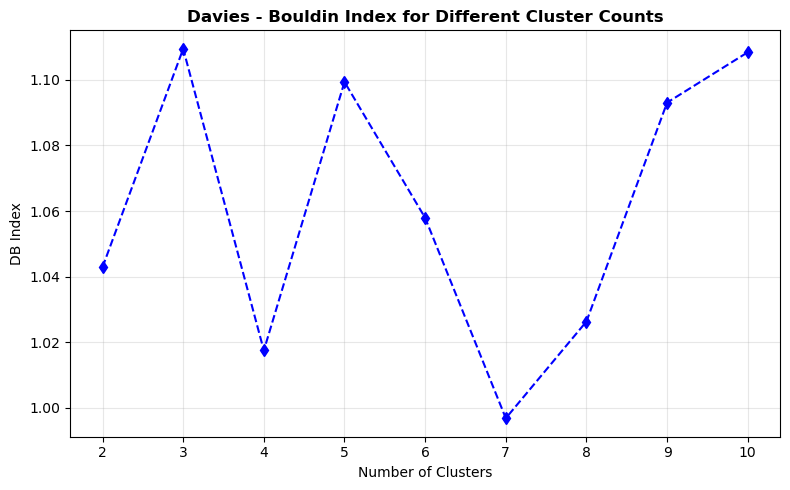

In [45]:
# Visualize Davies-Bouldin Index for different cluster counts
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, db_scores, marker='d', linestyle='--', color='b')
plt.title('Davies - Bouldin Index for Different Cluster Counts', fontsize=12, weight = 'bold')
plt.xlabel('Number of Clusters', fontsize=10)
plt.ylabel('DB Index', fontsize=10)
plt.xticks(cluster_range)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [47]:
# Choose the best number of clusters (minimum DB Index)
optimal_clusters = cluster_range[db_scores.index(min(db_scores))]
print(f'Optimal Number of Clusters: {optimal_clusters}')

Optimal Number of Clusters: 7


In [49]:
# Fit the final KMeans model
kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42)
cus_features['Cluster'] = kmeans_final.fit_predict(X_scaled)
cus_features

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,CustomerName,Region,SignupDate,SignupYear,Quantity,TotalValue,TransactionID,Cluster
0,C0001,Lawrence Carroll,3,2022-07-10,2022,12.0,3354.52,5.0,1
1,C0002,Elizabeth Lutz,0,2022-02-13,2022,10.0,1862.74,4.0,3
2,C0003,Michael Rivera,3,2024-03-07,2024,14.0,2725.38,4.0,1
3,C0004,Kathleen Rodriguez,3,2022-10-09,2022,23.0,5354.88,8.0,6
4,C0005,Laura Weber,0,2022-08-15,2022,7.0,2034.24,3.0,3
5,C0006,Brittany Palmer,3,2024-01-07,2024,12.0,4227.57,4.0,1
6,C0007,Paul Graves,0,2022-06-18,2022,8.0,2579.82,3.0,3
7,C0008,David Li,2,2024-01-13,2024,20.0,4271.61,10.0,6
8,C0009,Joy Clark,1,2023-08-14,2023,3.0,896.50,3.0,2
9,C0010,Aaron Cox,1,2022-12-15,2022,12.0,1717.55,4.0,3


In [137]:
# Evaluate clustering performance
final_db_index = davies_bouldin_score(X_scaled, cus_features['Cluster'])
silhouette_avg = silhouette_score(X_scaled, cus_features['Cluster'])
print('Final Davies-Bouldin Index: ', np.round(final_db_index,4))
print('Silhouette Score: ', np.round(silhouette_avg,4))

Final Davies-Bouldin Index:  0.9969
Silhouette Score:  0.3068


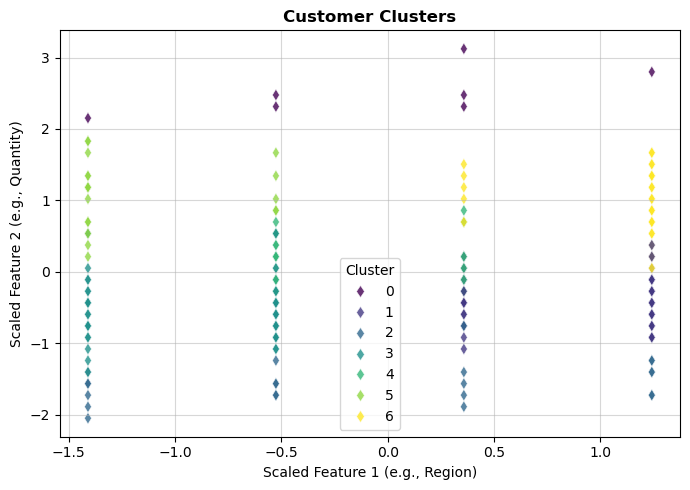

In [127]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x = X_scaled[:, 0], y = X_scaled[:, 1], hue = cus_features['Cluster'], palette='viridis', marker = 'd', legend='auto', alpha=0.8)
plt.title('Customer Clusters', fontsize=12, weight = 'bold')
plt.xlabel('Scaled Feature 1 (e.g., Region)', fontsize=10)
plt.ylabel('Scaled Feature 2 (e.g., Quantity)', fontsize=10)
plt.legend(title='Cluster')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [135]:
cus_features[['CustomerID', 'Cluster']].to_csv('Vignesh_S_Clustering.csv', index=False)

print('Number of Clusters Formed: ', optimal_clusters)
print('Final Davies-Bouldin Index: ', np.round(final_db_index,4))
print('Silhouette Score: ', np.round(silhouette_avg,4))

Number of Clusters Formed:  7
Final Davies-Bouldin Index:  0.9969
Silhouette Score:  0.3068
